##### Archivos Tidy
En este notebook, estariemos haciendo algunas pruebas para la obtención de archivos tidy a partir de los archivos raw, para ello iniciaremos importando los modulos necesarios para dicha actividad.

In [73]:
# Importamos los modulos necesarios para la libreta
import pandas as pd #Importamos el modulo pandas
import os #Importamos el modulo os
import geopandas as gpd #Importamos el modulo geopandas
from shapely.geometry import Point #Importamos el metodo Point del modulo shapely 

In [74]:
# Encontramos el ruta del directorio raw
directorio = os.path.dirname(os.getcwd()) + '/data/raw/'

A continuación leemos el archvio "260300001a" que se encuentran en el directorio de raw que descargamos con anterioridad.

In [75]:
hermosillo = gpd.read_file(directorio + '260300001a.shp')
hermosillo

,GEOGRAFICO,CVEGEO,CODIGO,FECHAACT,INSTITUC,GEOMETRIA,geometry
0,ÁREA GEOESTADÍSTICA BÁSICA,2603000011869,6052,12/2007,INEGI,ÁREA,"POLYGON ((1628105.477 1920205.715, 1628295.245..."
1,ÁREA GEOESTADÍSTICA BÁSICA,2603000011746,6052,12/2007,INEGI,ÁREA,"POLYGON ((1628032.93 1921100.78, 1628030.077 1..."
2,ÁREA GEOESTADÍSTICA BÁSICA,2603000012246,6052,12/2007,INEGI,ÁREA,"POLYGON ((1623070.211 1922088.608, 1623066.931..."
3,ÁREA GEOESTADÍSTICA BÁSICA,2603000011750,6052,12/2007,INEGI,ÁREA,"POLYGON ((1628614.97 1922405.429, 1628619.025 ..."
4,ÁREA GEOESTADÍSTICA BÁSICA,2603000011799,6052,12/2007,INEGI,ÁREA,"POLYGON ((1626439.624 1919837.824, 1626436.398..."
...,...,...,...,...,...,...,...
459,ÁREA GEOESTADÍSTICA BÁSICA,2603000018921,6052,12/2007,INEGI,ÁREA,"POLYGON ((1620582.475 1923960.596, 1620637.305..."
460,ÁREA GEOESTADÍSTICA BÁSICA,2603000018936,6052,12/2007,INEGI,ÁREA,"POLYGON ((1618977.777 1924068.068, 1618964.124..."
461,ÁREA GEOESTADÍSTICA BÁSICA,2603000018866,6052,12/2007,INEGI,ÁREA,"POLYGON ((1629804.448 1907536.96, 1629842.996 ..."
462,ÁREA GEOESTADÍSTICA BÁSICA,2603000018870,6052,12/2007,INEGI,ÁREA,"POLYGON ((1621991.424 1914892.695, 1622017.858..."


Tomamos solamente las columnas que nos interesan las cuales son 'CVEGEO' que es donde se encuentra la informacioón de los agebs, y la columna 'geometry' donde se encuentra la geometría de las agebs. Como estamos trabajando unicamente con la ciudad de Hermosillo,podemos tomar solamente las últimos cuatro elementos de la columna 'CVEGEO' y por último solamente veamos cual es cual es el Sistema de Referencia de Coordenadas (CRS).

In [76]:
hermosillo = hermosillo[['CVEGEO','geometry']]
hermosillo['CVEGEO'] = hermosillo['CVEGEO'].str[-4:]


/home/jesolis14/Documentos/GitHub/proyecto-baches-hmo/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [77]:
hermosillo.crs

<Projected CRS: PROJCS["ccl_itrf92",GEOGCS["ITRF_1992",DATUM["Inte ...>
Name: ccl_itrf92
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 1992
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Hacemos una gráfica del DtaFrame

<Axes: >

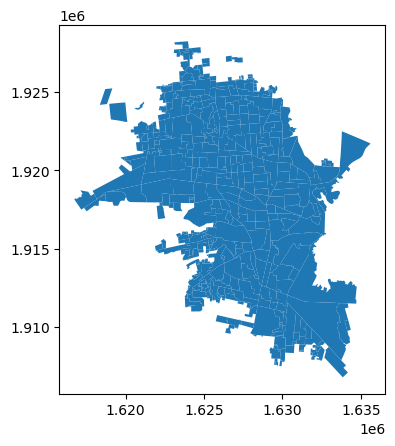

In [78]:
hermosillo.plot()

Lo que haremos ahora es crear un DataFrame que contenga los datos del archivo 'conjunto_de_datos_ageb_urbana_26_cpv2020.csv', con la información que tenemos podemos crear nuestros datos Tidy, aunque podemos modificarla para obtener la información con mas certeza, pero esto será parte de la segunda parte del proyecto.

In [79]:
hmo_ec_2020 = pd.read_csv(directorio + 'conjunto_de_datos_ageb_urbana_26_cpv2020.csv')
hmo_ec_2020 = hmo_ec_2020[hmo_ec_2020['NOM_LOC']=='Hermosillo']
hmo_ec_2020 = hmo_ec_2020[hmo_ec_2020['POBTOT'] != 0]
hmo_ec_2020

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
26101,26,Sonora,30,Hermosillo,1,Hermosillo,0076,1,4,*,...,*,*,*,*,*,*,*,*,*,*
26103,26,Sonora,30,Hermosillo,1,Hermosillo,0080,1,118,62,...,*,30,12,12,5,5,*,3,18,*
26104,26,Sonora,30,Hermosillo,1,Hermosillo,0080,2,133,72,...,*,34,7,20,*,3,0,*,22,0
26105,26,Sonora,30,Hermosillo,1,Hermosillo,0080,3,11,6,...,0,4,3,*,0,*,0,0,*,0
26106,26,Sonora,30,Hermosillo,1,Hermosillo,0080,4,70,39,...,*,22,3,7,*,0,*,*,19,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42178,26,Sonora,30,Hermosillo,1,Hermosillo,8993,39,6,*,...,*,*,*,*,*,*,*,*,*,*
42179,26,Sonora,30,Hermosillo,1,Hermosillo,8993,40,50,26,...,5,19,15,11,11,4,*,0,3,0
42180,26,Sonora,30,Hermosillo,1,Hermosillo,8993,41,29,14,...,3,12,9,9,5,4,*,0,*,0
42181,26,Sonora,30,Hermosillo,1,Hermosillo,8993,42,60,35,...,6,21,18,13,9,5,0,0,3,0


In [80]:
hmo_ec_2020['VPH_TELEF'].unique()

array(['*', '0', '5', '4', '3', '10', '6', '7', '8', '9', '11', '22',
       '26', '13', '12', '20', '25', '15', '14', '16', '23', '19', '18',
       '17', '28', '24', '37', 'N/D', '21', '36', '32', '30', '82', '44',
       '33', '29', '31', '27', '40', '47', '42', '99', '93', '49', '41',
       '53', '67', '57', '38', '71', '74', '54', '79', '39', '55', '73',
       '66', '72', '46', '48', '34', '35', '50', '68', '45', '115', '60',
       '96', '51', '63', '43', '58', '62', '78', '52', '80'], dtype=object)

In [81]:
print(str(hmo_ec_2020.dtypes.to_list()[0]))
print(hmo_ec_2020.columns.to_list())

int64
['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'AGEB', 'MZA', 'POBTOT', 'POBFEM', 'POBMAS', 'P_0A2', 'P_0A2_F', 'P_0A2_M', 'P_3YMAS', 'P_3YMAS_F', 'P_3YMAS_M', 'P_5YMAS', 'P_5YMAS_F', 'P_5YMAS_M', 'P_12YMAS', 'P_12YMAS_F', 'P_12YMAS_M', 'P_15YMAS', 'P_15YMAS_F', 'P_15YMAS_M', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_3A5', 'P_3A5_F', 'P_3A5_M', 'P_6A11', 'P_6A11_F', 'P_6A11_M', 'P_8A14', 'P_8A14_F', 'P_8A14_M', 'P_12A14', 'P_12A14_F', 'P_12A14_M', 'P_15A17', 'P_15A17_F', 'P_15A17_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'P_15A49_F', 'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'REL_H_M', 'POB0_14', 'POB15_64', 'POB65_MAS', 'PROM_HNV', 'PNACENT', 'PNACENT_F', 'PNACENT_M', 'PNACOE', 'PNACOE_F', 'PNACOE_M', 'PRES2015', 'PRES2015_F', 'PRES2015_M', 'PRESOE15', 'PRESOE15_F', 'PRESOE15_M', 'P3YM_HLI', 'P3YM_HLI_F', 'P3YM_HLI_M', 'P3HLINHE', 'P3HLINHE_F', 'P3HLINHE_M', 'P3HLI_HE', 'P3HLI_HE_F', 'P3HLI_HE_M', 'P5_HLI', 'P5_HLI_NHE', 'P5_HLI_HE', 'PHOG_IND', 'POB_AFRO', 'POB_AFRO_F

Cambiemos el crs del DataFrame 'Hermosillo' al epsg 4326, que hasta donde yo sé es el más conocido.

In [82]:
hermosillo = hermosillo.to_crs(epsg=4326)


Ahora leamos el archivo 'baches_hmo_2021_2024.csv', que se encuentra en nuestro directorio raw, creamos una columna llamada geometry que tomara la longitud y latitud dadas en nuestro DataFrame y lo convertira en un "punto" del tipo geometrico, por último le asignamos el epsg 4326, para así poder hacer un join del tipo geometrico con el DataFrame 'Hermosillo'.

In [83]:
baches = gpd.read_file(directorio + 'baches_hmo_2021_2024.csv')
baches['geometry'] = baches.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
baches = gpd.GeoDataFrame(baches, geometry='geometry')
baches.set_crs(epsg=4326, inplace=True)  


,field_1,latitude,longitude,date,neighborhoods,material,description,id,geometry
0,0,29.09416060,-110.96947080,2021-10-18,[551],1,"Hay un bache en la calle, y los carros se golp...",1,POINT (-110.96947 29.09416)
1,1,29.12406030,-110.97131830,2021-10-19,[601],1,"Buen dia! Para reportar pavimento dañado, bach...",4,POINT (-110.97132 29.12406)
2,2,29.12398540,-110.97128560,2021-10-19,[601],1,"Buen dia! Para reportar pavimento dañado, bach...",5,POINT (-110.97129 29.12399)
3,3,29.12877657,-110.95392611,2021-10-21,[49],1,toda la calle desde el blvd Morelos tiene vari...,6,POINT (-110.95393 29.12878)
4,4,29.08380860,-111.04210120,2021-10-04,[74],1,C. SOLICITA BACHEO ASEGURA REPORTANTE QUE ES P...,7,POINT (-111.0421 29.08381)
...,...,...,...,...,...,...,...,...,...
18072,18072,29.15306423,-110.97751181,2024-10-04,[679],1,Bacheo en Luz Valencia entre Reforma y Villas...,21292,POINT (-110.97751 29.15306)
18073,18073,29.15594200,-110.99905900,2024-10-04,[441],1,Bacheo en Paseo Romanza esquina con Rotello,21293,POINT (-110.99906 29.15594)
18074,18074,29.09045299,-110.98337410,2024-10-04,[11],1,Bacheo en Calle Barranca entre Calle De Muro y...,21294,POINT (-110.98337 29.09045)
18075,18075,29.11766570,-110.95117440,2024-10-04,[49],1,Bacheo en Bulevar Morelos entre Av Siete y C. ...,21295,POINT (-110.95117 29.11767)


Hacemos el join usando una metodo llamado sjoin de los archivos tipos GeoDataFrame.

In [84]:
baches = gpd.sjoin(baches, hermosillo, how='left', predicate='within')


Ya casi por terminar solamente nos enfocamos en las columnas que nos interesan y les asignamos el tipo correspondiente

In [85]:
baches = baches[['latitude', 'longitude','CVEGEO', 'date', 'neighborhoods', 'description', 'geometry']]
baches['date'] = pd.to_datetime(baches['date'])
baches['latitude'] = pd.to_numeric(baches['latitude'])
baches['longitude'] = pd.to_numeric(baches['longitude'])
baches.head()

,latitude,longitude,CVEGEO,date,neighborhoods,description,geometry
0,29.094161,-110.969471,1996,2021-10-18,[551],"Hay un bache en la calle, y los carros se golp...",POINT (-110.96947 29.09416)
1,29.124060,-110.971318,1746,2021-10-19,[601],"Buen dia! Para reportar pavimento dañado, bach...",POINT (-110.97132 29.12406)
2,29.123985,-110.971286,1746,2021-10-19,[601],"Buen dia! Para reportar pavimento dañado, bach...",POINT (-110.97129 29.12399)
3,29.128777,-110.953926,5043,2021-10-21,[49],toda la calle desde el blvd Morelos tiene vari...,POINT (-110.95393 29.12878)
4,29.083809,-111.042101,2617,2021-10-04,[74],C. SOLICITA BACHEO ASEGURA REPORTANTE QUE ES P...,POINT (-111.0421 29.08381)


Por último tenemos uns scatter que nos indica donde se encuentran los baches.

<Axes: >

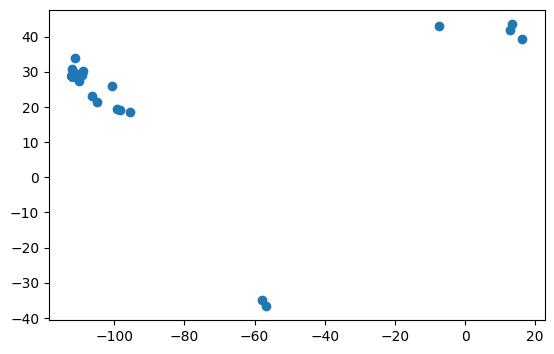

In [86]:
baches.plot()